# Task 5: Group Analysis

After individual analysis, we will be performing analysing the US baby name dataframe as a team here. 
Jamie and Rita analyzed the states level csv file and Leo analyzed the National level csv file.
After discussion, we will be answering the three research questions as following:

### Research Question 1

What is the top 5 names from 1910 to 2015 in the US? How similar is it with the top 5 names in four US regions (North_East, South, West, Middle_West)?

### Research Question 2

Compare the most popular name at the state and national level in a decade: What is the most popular name in each year from 1910-2014?


### Research Question 3
What is the most popular national female name from 1910-2015? How about in each of the four regions? When does this name become popular (trend)? 
___

## Importing necessary modules and seperate data into 4 regions

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scripts import project_functions as pf

In [4]:
national_df = pf.load_and_process_one('../../data/raw/national/NationalNames.csv')
national_df

,Name,Year,Gender,Count
0,Mary,1910,F,22848
1,Helen,1910,F,10479
2,Margaret,1910,F,8226
3,Dorothy,1910,F,7318
4,Ruth,1910,F,7212
...,...,...,...,...
1736485,Zykeem,2014,M,5
1736486,Zymeer,2014,M,5
1736487,Zymiere,2014,M,5
1736488,Zyran,2014,M,5


In [5]:
# Load 4 parts of raw data on State Names
state_df = pf.load_and_process_many("../../data/raw/state")

# Note that the project_fuctions module includes list of abbreviations for states separated in regions
# import the regional datasets
def get_state_df(state_list, source=state_df):
    return source.loc[source["State"].isin(state_list)].reset_index(drop=True)


n_df = get_state_df(pf.NORTH_EAST) # North East data set
s_df = get_state_df(pf.SOUTH)      # South data set
mw_df = get_state_df(pf.MID_WEST)  # Mid West data set
w_df = get_state_df(pf.WEST)    # West data set

In [64]:
# Sample data frame
w_df

,Name,Year,Gender,State,Count
0,Mary,1910,F,AK,14
1,Annie,1910,F,AK,12
2,Anna,1910,F,AK,10
3,Margaret,1910,F,AK,8
4,Helen,1910,F,AK,7
...,...,...,...,...,...
1156146,Seth,2014,M,WY,5
1156147,Spencer,2014,M,WY,5
1156148,Tyce,2014,M,WY,5
1156149,Victor,2014,M,WY,5


## Method to get all time top 5 name by gender (national)

In [6]:
# Sorting top names by gender 
top_names = national_df.sort_values(ascending=False,by=['Count'])
top_male = national_df.loc[national_df['Gender'] == 'M'].sort_values(ascending=False, by=['Count'])
top_female = national_df.loc[national_df['Gender'] == 'F'].sort_values(ascending=False,by=['Count'])

# Grouping to remove duplicates and saving top 5 to a new dataframe
top_5_names = top_names.groupby(['Name','Gender'],as_index=False).agg(sum).sort_values(ascending=False, by=['Count']).head()
top_5_male = top_male.groupby(['Name','Gender'],as_index=False).agg(sum).sort_values(ascending=False, by=['Count']).head()
top_5_female = top_female.groupby(['Name','Gender'],as_index=False).agg(sum).sort_values(ascending=False, by=['Count']).head()
top_5_names

,Name,Gender,Year,Count
41451,James,M,206010,4938968
46113,John,M,206010,4829733
80357,Robert,M,206010,4710618
67660,Michael,M,206010,4296488
99877,William,M,206010,3829026


In [16]:
top_5_male

,Name,Gender,Year,Count
16382,James,M,206010,4938968
18391,John,M,206010,4829733
30746,Robert,M,206010,4710618
25810,Michael,M,206010,4296488
37525,William,M,206010,3829026


In [17]:
top_5_female

,Name,Gender,Year,Count
40346,Mary,F,206010,3730968
46776,Patricia,F,206010,1568838
18071,Elizabeth,F,206010,1500534
26750,Jennifer,F,190700,1462742
36489,Linda,F,206010,1448479


## Method to get all time top 5 in each region

In [7]:
# Define processing function
def get_top5_all_time(data=None):
    if data is None:
        return data
    return (data.groupby(by="Name").sum()
              .drop(columns=["Year"]) # We do not analyze with time
              .sort_values(by="Count", ascending=False)
              .reset_index()
              .head()
           )
# For the middle_west
top5_mw = get_top5_all_time(mw_df)
# For the west
top5_w = get_top5_all_time(w_df)
# For the North
top5_n = get_top5_all_time(n_df)
# For the south
top5_s = get_top5_all_time(s_df)

In [43]:
# Sample data frame
top5_w 

,Name,Count
0,Michael,748282
1,Robert,652150
2,David,647996
3,John,589500
4,James,545148


## Method to get all time top 5 based on gender

In [8]:
# Function for filter data based on gender
def get_top5_gender(data, region, gender):
    return (data.loc[data["Gender"] == gender]
                    .groupby(by="Name").sum()
                    .sort_values(by="Count", ascending=False)
                    .head()
                    .drop(columns="Year") # We do not care about year
                    .assign(Region=region, Gender=gender)
                    .reset_index()
            )

# In the North East
top5_male_n, top5_female_n = get_top5_gender(n_df, "NE", "M"), get_top5_gender(n_df, "NE", "F")

# In the South
top5_male_s, top5_female_s = get_top5_gender(s_df, "S", "M"), get_top5_gender(s_df, "S", "F")

# In the West
top5_male_w, top5_female_w = get_top5_gender(w_df, "W", "M"), get_top5_gender(w_df, "W", "F")

# In the Mid West
top5_male_mw, top5_female_mw = get_top5_gender(mw_df, "MW", "M"), get_top5_gender(mw_df, "MW", "F")                             

In [41]:
# Sample data frame
top5_male_w

,Name,Count,Region,Gender
0,Michael,744895,W,M
1,Robert,650605,W,M
2,David,646280,W,M
3,John,588235,W,M
4,James,543933,W,M


In [32]:
top5_female_w

,Name,Count,Region,Gender
0,Mary,339339,W,F
1,Jennifer,301413,W,F
2,Jessica,234652,W,F
3,Elizabeth,228588,W,F
4,Patricia,208413,W,F


## Method to get most popular female name in 1910 and its proportion from 1910 to 2015

In [38]:
def get_top_1910_fname(data, region=None):
    if data is None:
        return data
    top_fname = (data.loc[data["Year"] == 1910]
                   .groupby(by="Name").sum()
                   .drop(columns="Year")
                   .sort_values(by="Count", ascending=False)
                   .index[0]
                )
    # Pivot table of Years vs Name 
    fname_year = (data.loc[data["Name"] == top_fname]
                .pivot_table(index="Year",columns="Name",values="Count", aggfunc=np.sum)
            )
    # Find the total count in each year
    y = data.groupby(by="Year").agg(np.sum)

    # Divide each row (year) by the total of that year
    for year in range(1910, 2015):
        fname_year.loc[year,:] = fname_year.loc[year,:]/y.loc[year,"Count"]

    return fname_year

# Top female name of North East in 1910 and its trend
f_name_n = get_top_1910_fname(data=n_df, region="NE")

# Top female name of North East in 1910 and its trend
f_name_s = get_top_1910_fname(data=s_df, region="S")

# Top female name of North East in 1910 and its trend
f_name_w = get_top_1910_fname(data=w_df, region="W")

# Top female name of North East in 1910 and its trend
f_name_mw = get_top_1910_fname(data=mw_df, region="MW")


In [39]:
# Sample data frame
f_name_w 

Name,Mary
Year,
1910,0.042355
1911,0.042245
1912,0.034384
1913,0.030812
1914,0.030345
...,...
2010,0.000531
2011,0.000519
2012,0.000493


## Method to get most popular name in a decade

In [80]:
def get_top_in_interval(data, begin, stop):
    top = list()
    # Extract only the year in interest
    for year in range(begin, stop+1):
        top_in_year =   (data.loc[data["Year"] == year]
                         .groupby(by="Name").sum()
                         .sort_values(by="Count", ascending=False)
                         .assign(Year=year)
                         .reset_index()
                         .iloc[0]
                        )
        top.append(top_in_year)

    top_in_interval = pd.concat(top, axis=1, ignore_index=True).T
    return top_in_interval
        
get_top_in_interval(s_df, begin=2000, stop=2014)

,Name,Year,Count
0,Jacob,2000,12405
1,Jacob,2001,11839
2,Jacob,2002,11228
3,Jacob,2003,11063
4,Jacob,2004,10611
5,Jacob,2005,9699
6,Jacob,2006,9351
7,Jacob,2007,9222
8,Jacob,2008,8424
9,Jayden,2009,7982


## Getting the top name of each region and adding up count values for each year from 1910-2014

In [84]:
# getting a list of the top name for each region and for national
name_list = [top_5_names.head(1).iloc[0]['Name'],top5_n.head(1).iloc[0]['Name'],top5_s.head(1).iloc[0]['Name'],top5_w.head(1).iloc[0]['Name'],top5_mw.head(1).iloc[0]['Name']]

# Cleaning dataframe to only show top name, and its count value for each year 
top_national = national_df.drop(columns='Gender').groupby(['Name','Year'],as_index=False).agg(np.sum).sort_values(ascending=False, by=['Count'])
top_national = top_national.loc[(top_national['Name'] == name_list[0])].reset_index(drop=True)

# Adding the region in name column
for i in range(0,105):
    top_national.loc[i,'Name'] = 'James (national)'
top_national.reset_index(drop=True)

,Name,Year,Count
0,James (national),1947,95012
1,James (national),1948,88847
2,James (national),1946,87675
3,James (national),1951,87434
4,James (national),1952,87344
...,...,...,...
100,James (national),2013,13530
101,James (national),2012,13413
102,James (national),2011,13257
103,James (national),1911,10020


In [75]:
# Cleaning dataframe to only show top name, and its count value for each year (north)
top_north = n_df.loc[(n_df['Name'] == name_list[1])]
top_north = top_north.drop(columns=['Gender','State']).groupby(['Name','Year'],as_index=False).agg(np.sum).sort_values(ascending=False, by=['Count'])

# Adding the region in name column
for i in range(0,105):
    top_north.loc[i,'Name'] = 'John (North)'
top_north.reset_index(drop=True)

,Name,Year,Count
0,John (North),1947,29907
1,John (North),1948,27385
2,John (North),1946,26842
3,John (North),1952,26805
4,John (North),1964,26801
...,...,...,...
100,John (North),2011,2737
101,John (North),2010,2730
102,John (North),2012,2461
103,John (North),2013,2385


In [81]:
# Cleaning dataframe to only show top name, and its count value for each year (South)
top_south = s_df.loc[(s_df['Name'] == name_list[2])]
top_south = top_south.drop(columns=['Gender','State']).groupby(['Name','Year'],as_index=False).agg(np.sum).sort_values(ascending=False, by=['Count'])

# Adding the region in name column
for i in range(0,105):
    top_south.loc[i,'Name'] = 'James (South)'
top_south.reset_index(drop=True)

,Name,Year,Count
0,James (South),1947,37798
1,James (South),1948,35519
2,James (South),1946,35110
3,James (South),1943,34618
4,James (South),1949,34482
...,...,...,...
100,James (South),2010,5772
101,James (South),1910,5676
102,James (South),2012,5583
103,James (South),2013,5572


In [77]:
# Cleaning dataframe to only show top name, and its count value for each year (West)
top_west = w_df.loc[(w_df['Name'] == name_list[3])]
top_west = top_west.drop(columns=['Gender','State']).groupby(['Name','Year'],as_index=False).agg(np.sum).sort_values(ascending=False, by=['Count'])

# Adding the region in name column
for i in range(0,105):
    top_west.loc[i,'Name'] = 'Michael (West)'
top_west.reset_index(drop=True)

,Name,Year,Count
0,Michael (West),1954,14525
1,Michael (West),1957,14401
2,Michael (West),1969,14333
3,Michael (West),1956,14327
4,Michael (West),1970,14224
...,...,...,...
100,Michael (West),1914,64
101,Michael (West),1913,54
102,Michael (West),1912,47
103,Michael (West),1910,13


In [78]:
# Cleaning dataframe to only show top name, and its count value for each year (MidWest)
top_midwest = mw_df.loc[(mw_df['Name'] == name_list[4])]
top_midwest = top_midwest.drop(columns=['Gender','State']).groupby(['Name','Year'],as_index=False).agg(np.sum).sort_values(ascending=False, by=['Count'])

# Adding the region in name column
for i in range(0,105):
    top_midwest.loc[i,'Name'] = 'Robert (Mid-West)'
top_midwest.reset_index(drop=True)

,Name,Year,Count
0,Robert (Mid-West),1947,26818
1,Robert (Mid-West),1951,25297
2,Robert (Mid-West),1952,25050
3,Robert (Mid-West),1948,24894
4,Robert (Mid-West),1946,24703
...,...,...,...
100,Robert (Mid-West),1910,1303
101,Robert (Mid-West),2011,1299
102,Robert (Mid-West),2012,1274
103,Robert (Mid-West),2013,1236


In [79]:
# merging the dataframes of each region into one
merged_df = pd.concat([top_national,top_north,top_south,top_west,top_midwest]).reset_index(drop=True)
merged_df

,Name,Year,Count
0,James (national),1947,95012
1,James (national),1948,88847
2,James (national),1946,87675
3,James (national),1951,87434
4,James (national),1952,87344
...,...,...,...
520,Robert (Mid-West),1910,1303
521,Robert (Mid-West),2011,1299
522,Robert (Mid-West),2012,1274
523,Robert (Mid-West),2013,1236


## Getting the top female name of the national dataset and finding the occurence count for each region for each year

In [98]:
# Getting the top female name from the national dataset (National)
top_f = top_5_female.head(1).iloc[0]['Name']

# Cleaning dataframe to only show top name, and its count value for each year 
top_national_f = national_df.drop(columns='Gender').groupby(['Name','Year'],as_index=False).agg(np.sum).sort_values(ascending=False, by=['Count'])
top_national_f = top_national.loc[(top_national['Name'] == top)].reset_index(drop=True)
top_national_f.reset_index(drop=True)

# Adding the region in name column
for i in range(0,105):
    top_national_f.loc[i,'Name'] = top_f + ' (National)'
top_national_f.reset_index(drop=True)

,Name,Year,Count
0,Mary (National),1921,74172
1,Mary (National),1924,73750
2,Mary (National),1922,72357
3,Mary (National),1947,71868
4,Mary (National),1923,71837
...,...,...,...
100,Mary (National),2010,2862
101,Mary (National),2011,2701
102,Mary (National),2013,2632
103,Mary (National),2014,2616


In [91]:
# Cleaning dataframe to only show top name, and its count value for each year (North)
top_north_f = n_df.drop(columns='Gender').groupby(['Name','Year'],as_index=False).agg(np.sum).sort_values(ascending=False, by=['Count'])
top_north_f = top_north_f.loc[(top_north_f['Name'] == top)].reset_index(drop=True)
top_north_f.reset_index(drop=True)

# Adding the region in name column
for i in range(0,105):
    top_north_f.loc[i,'Name'] = top_f + ' (North)'
top_north_f.reset_index(drop=True)

,Name,Year,Count
0,Mary (North),1918,22125
1,Mary (North),1921,21734
2,Mary (North),1917,21640
3,Mary (North),1920,21221
4,Mary (North),1915,21107
...,...,...,...
100,Mary (North),2009,512
101,Mary (North),2014,445
102,Mary (North),2012,408
103,Mary (North),2011,406


In [92]:
# Cleaning dataframe to only show top name, and its count value for each year (South)
top_south_f = s_df.drop(columns='Gender').groupby(['Name','Year'],as_index=False).agg(np.sum).sort_values(ascending=False, by=['Count'])
top_south_f = top_south_f.loc[(top_south_f['Name'] == top)].reset_index(drop=True)
top_south_f.reset_index(drop=True)

# Adding the region in name column
for i in range(0,105):
    top_south_f.loc[i,'Name'] = top_f + ' (South)'
top_south_f.reset_index(drop=True)

,Name,Year,Count
0,Mary (South),1924,30748
1,Mary (South),1925,30306
2,Mary (South),1927,30025
3,Mary (South),1922,29211
4,Mary (South),1926,29170
...,...,...,...
100,Mary (South),2010,1397
101,Mary (South),2011,1369
102,Mary (South),2013,1297
103,Mary (South),2014,1294


In [93]:
# Cleaning dataframe to only show top name, and its count value for each year (West)
top_west_f = w_df.drop(columns='Gender').groupby(['Name','Year'],as_index=False).agg(np.sum).sort_values(ascending=False, by=['Count'])
top_west_f = top_west_f.loc[(top_west_f['Name'] == top)].reset_index(drop=True)
top_west_f.reset_index(drop=True)

# Adding the region in name column
for i in range(0,105):
    top_west_f.loc[i,'Name'] = top_f + ' (West)'
top_west_f.reset_index(drop=True)

,Name,Year,Count
0,Mary (West),1954,7527
1,Mary (West),1947,7395
2,Mary (West),1948,7240
3,Mary (West),1952,7230
4,Mary (West),1953,7203
...,...,...,...
100,Mary (West),2010,415
101,Mary (West),2013,409
102,Mary (West),2011,399
103,Mary (West),2014,387


In [94]:
# Cleaning dataframe to only show top name, and its count value for each year (Mid-West)
top_midwest_f = mw_df.drop(columns='Gender').groupby(['Name','Year'],as_index=False).agg(np.sum).sort_values(ascending=False, by=['Count'])
top_midwest_f = top_midwest_f.loc[(top_midwest_f['Name'] == top)].reset_index(drop=True)
top_midwest_f.reset_index(drop=True)

# Adding the region in name column
for i in range(0,105):
    top_midwest_f.loc[i,'Name'] = top_f + ' (Mid-West)'
top_midwest_f.reset_index(drop=True)

,Name,Year,Count
0,Mary (Mid-West),1954,22452
1,Mary (Mid-West),1947,21610
2,Mary (Mid-West),1951,21194
3,Mary (Mid-West),1948,20978
4,Mary (Mid-West),1952,20903
...,...,...,...
100,Mary (Mid-West),2010,584
101,Mary (Mid-West),2011,566
102,Mary (Mid-West),2013,557
103,Mary (Mid-West),2012,546


In [96]:
# merging the dataframes of each region into one
merged_df_f = pd.concat([top_national_f,top_north_f,top_south_f,top_west_f,top_midwest_f]).reset_index(drop=True)
merged_df_f

,Name,Year,Count
0,Mary,1921,74172
1,Mary,1924,73750
2,Mary,1922,72357
3,Mary,1947,71868
4,Mary,1923,71837
...,...,...,...
520,Mary (Mid-West),2010,584
521,Mary (Mid-West),2011,566
522,Mary (Mid-West),2013,557
523,Mary (Mid-West),2012,546


## Method from graph (references)

- You can find in Rita or Jamie's notebook!

## Research Question 1:

---

## Visualisation 1.1 : Top 5 names of all time (North and South)

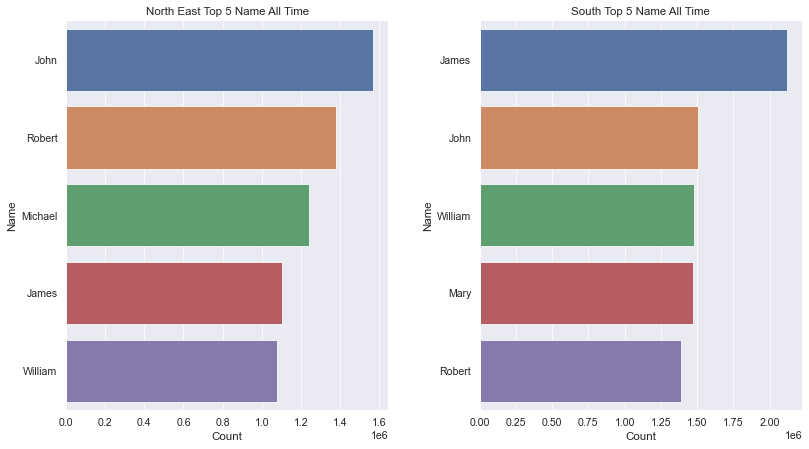

In [8]:
# Check similarity between 2 regions
sns.set_theme(context="paper", style="darkgrid",  font_scale=1.2, )


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,7))
# North graph
north = sns.barplot(y="Name",
            x="Count",
            data=top5_n,
            order=top5_n["Name"],
            ax=ax[0]
            )
north.set_title("North East Top 5 Name All Time")

# South graph
south = sns.barplot(y="Name",
            x="Count",
            data=top5_s,
            order=top5_s["Name"],
            ax=ax[1])
south.set_title("South Top 5 Name All Time")

# Show plot
sns.despine()
fig.tight_layout(pad=3.0)
plt.show()

## Visualisation 1.2 : Top 5 names of all time (West and Midwest)

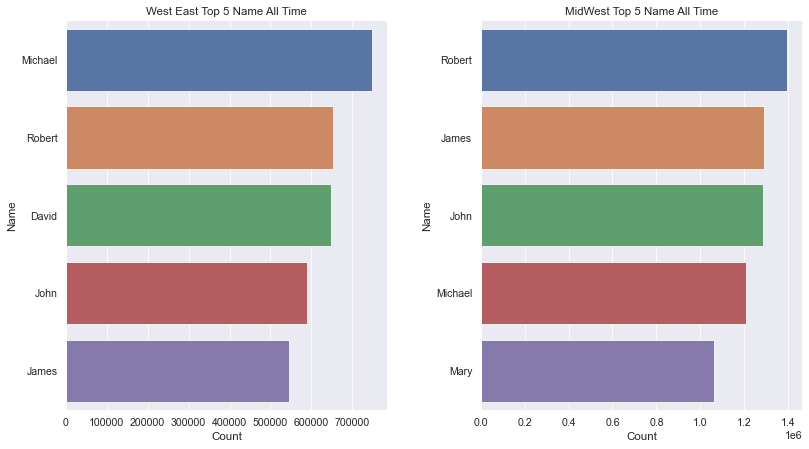

In [10]:
# Check similarity between 2 regions
sns.set_theme(context="paper", style="darkgrid",  font_scale=1.2, )


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,7))
# North graph
north = sns.barplot(y="Name",
            x="Count",
            data=top5_w,
            order=top5_w["Name"],
            ax=ax[0]
            )
north.set_title("West East Top 5 Name All Time")

# South graph
south = sns.barplot(y="Name",
            x="Count",
            data=top5_mw,
            order=top5_mw["Name"],
            ax=ax[1])
south.set_title("MidWest Top 5 Name All Time")

# Show plot
sns.despine()
fig.tight_layout(pad=3.0)
plt.show()

## Visualisation 1.3 : Top 5 names of all time (National)

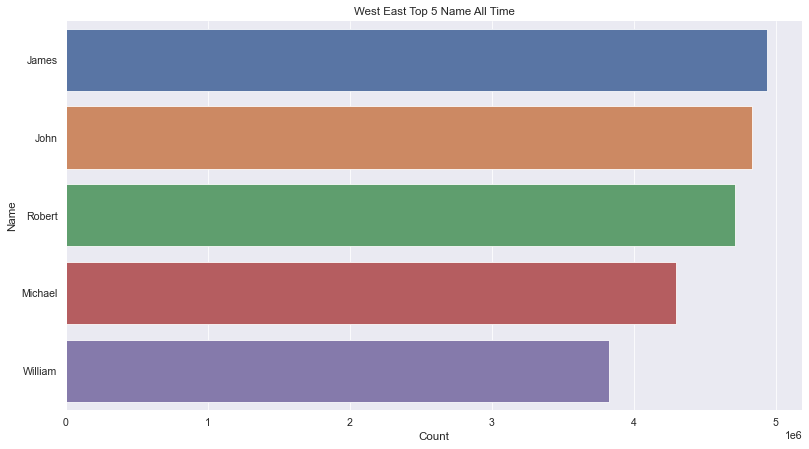

In [20]:
# Check similarity between 2 regions
sns.set_theme(context="paper", style="darkgrid",  font_scale=1.2, )
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,7))
# North graph
north = sns.barplot(y="Name",
            x="Count",
            data=top_5_names,
            order=top_5_names["Name"]
            )
north.set_title("Top 5 Name All Time (National)")

# Show plot
sns.despine()
fig.tight_layout(pad=3.0)
plt.show()

## Observations:
...

## Visualisation 1.4: Top 5 names per region seperated by gender (North and South)

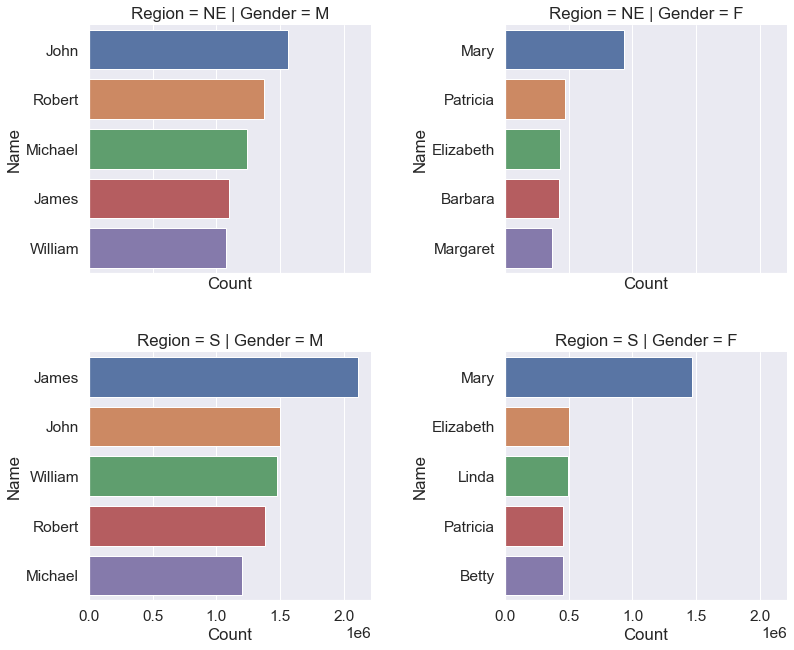

In [23]:
sns.set_theme(style="darkgrid", font_scale=1.4)
fig,ax= plt.subplots(2,2, figsize=(12,10), sharex=True)

data_list = [[top5_male_n,top5_female_n],[top5_male_s,top5_female_s]]   
def draw_gender_plot(axes, data_list, result_axes=None):
    if result_axes is None:
        result_axes = list()
    for i in range(2):
        for j in range(2):
            data = data_list[i][j]
            ax_ij = sns.barplot(x="Count",
                          y="Name",
                          data=data,
                          ax=ax[i][j]
                         )
            region, gender =data["Region"][0], data["Gender"][0]
            ax_ij.set_title(f"Region = {region} | Gender = {gender}")
            result_axes.append(ax_ij)
            
    return result_axes

ax = draw_gender_plot(ax, data_list)
sns.despine()
fig.tight_layout(pad=2.5)
plt.show()

## Visualisation 1.5: Top 5 names per region seperated by gender (West and Midwest)

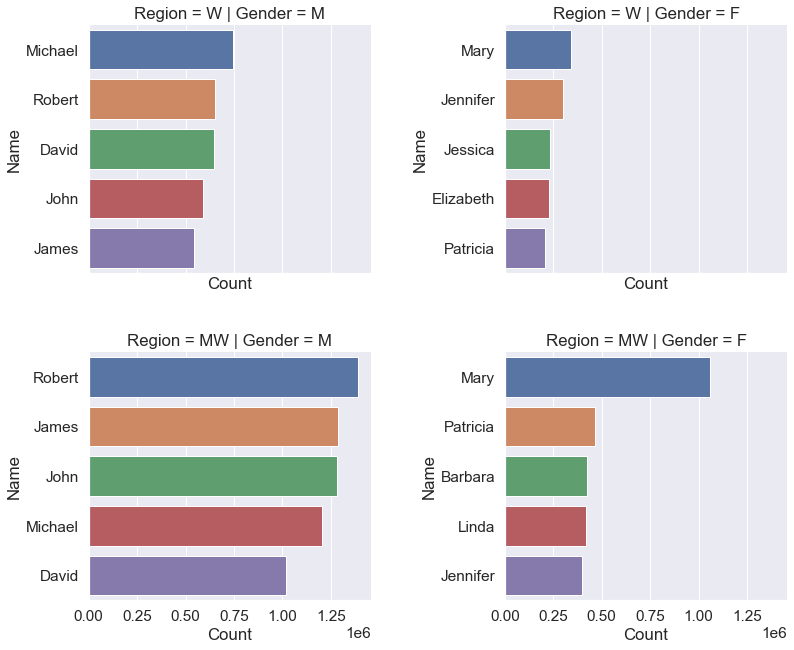

In [24]:
sns.set_theme(style="darkgrid", font_scale=1.4)
fig,ax= plt.subplots(2,2, figsize=(12,10), sharex=True)

data_list = [[top5_male_w,top5_female_w],[top5_male_mw,top5_female_mw]]   
def draw_gender_plot(axes, data_list, result_axes=None):
    if result_axes is None:
        result_axes = list()
    for i in range(2):
        for j in range(2):
            data = data_list[i][j]
            ax_ij = sns.barplot(x="Count",
                          y="Name",
                          data=data,
                          ax=ax[i][j]
                         )
            region, gender =data["Region"][0], data["Gender"][0]
            ax_ij.set_title(f"Region = {region} | Gender = {gender}")
            result_axes.append(ax_ij)
            
    return result_axes

ax = draw_gender_plot(ax, data_list)
sns.despine()
fig.tight_layout(pad=2.5)
plt.show()

## Visualisation 1.6: Top 5 names per region seperated by gender (National)

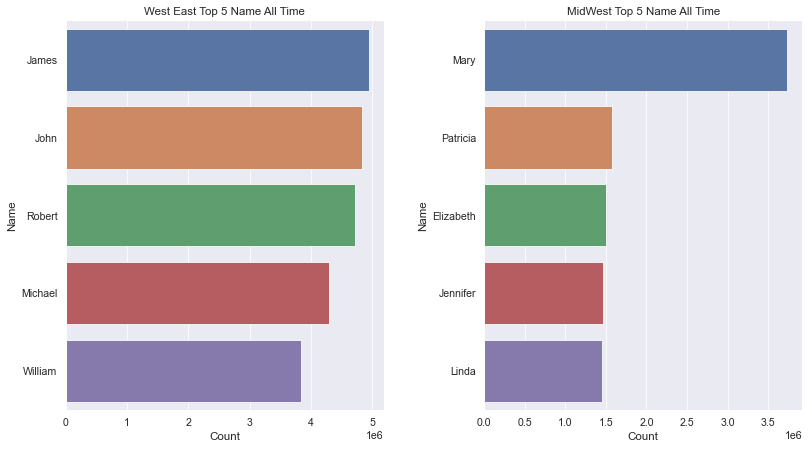

In [29]:
# Check similarity between 2 regions
sns.set_theme(context="paper", style="darkgrid", font_scale=1.2, )


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,7))
# North graph
north = sns.barplot(y="Name",
            x="Count",
            data=top_5_male,
            order=top_5_male["Name"],
            ax=ax[0]
            )
north.set_title("West East Top 5 Name All Time")

# South graph
south = sns.barplot(y="Name",
            x="Count",
            data=top_5_female,
            order=top_5_female["Name"],
            ax=ax[1])
south.set_title("MidWest Top 5 Name All Time")

# Show plot
sns.despine()
fig.tight_layout(pad=3.0)
plt.show()

## Observations:
...

## Research Question 2:

---

## Visualisation 2.1: Top name of each region tracked over each year

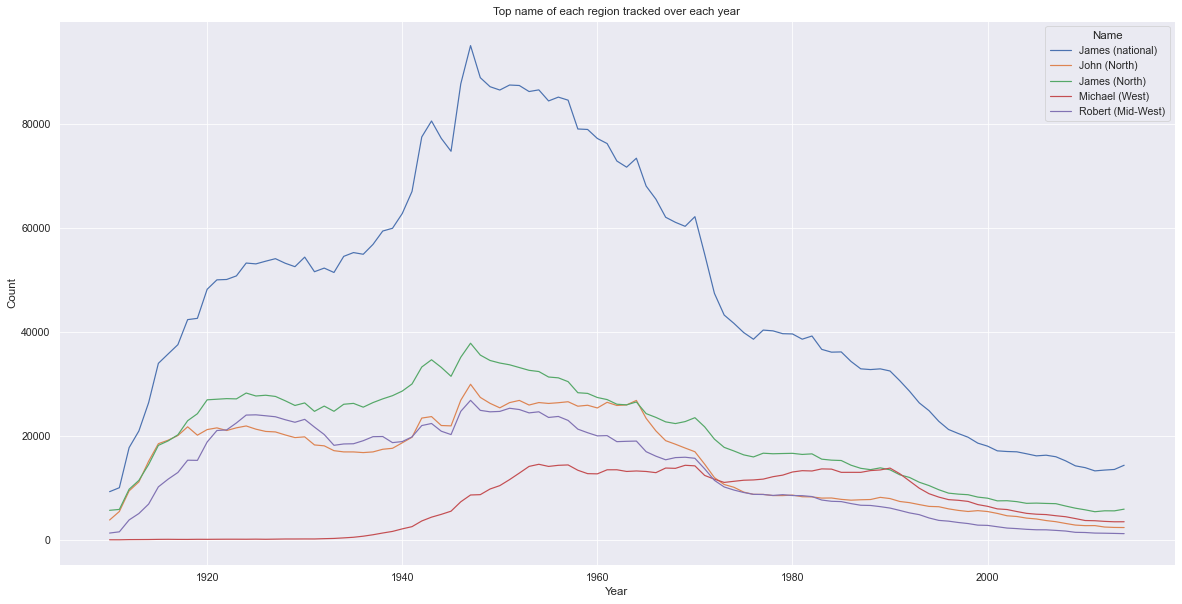

In [83]:
# Plotting the pivot table from section 2.2
sns.set_theme(context="paper", style="darkgrid", font_scale=1.2, )
fig, ax = plt.subplots(nrows=1, figsize=(20,10))

Chart4 = sns.lineplot(data=merged_df,
            x="Year",
            y='Count',
            hue='Name')
Chart4.set_title("Top name of each region tracked over each year")
plt.show()

## Observations:
...

## Research Question 3:

---

## Visualisation 3.1: Top female name of national set tracked over each year and each region

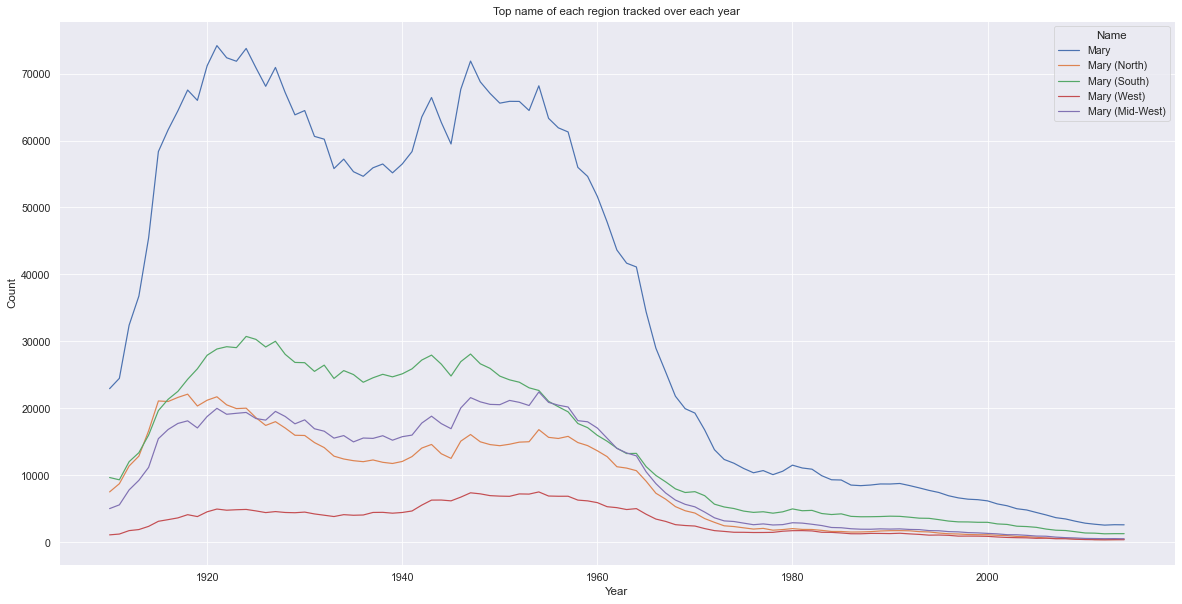

In [99]:
# Plotting the pivot table from section 2.2
sns.set_theme(context="paper", style="darkgrid", font_scale=1.2, )
fig, ax = plt.subplots(nrows=1, figsize=(20,10))

Chart4 = sns.lineplot(data=merged_df_f,
            x="Year",
            y='Count',
            hue='Name')
Chart4.set_title("Top name of each region tracked over each year")
plt.show()

## Observations
...